In [4]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

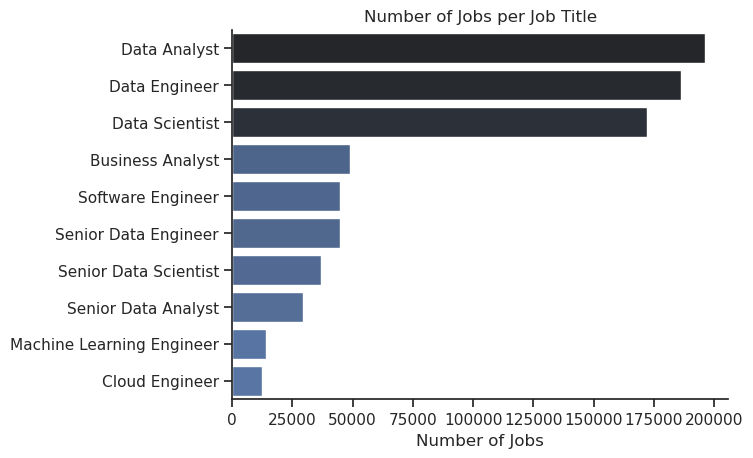

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()


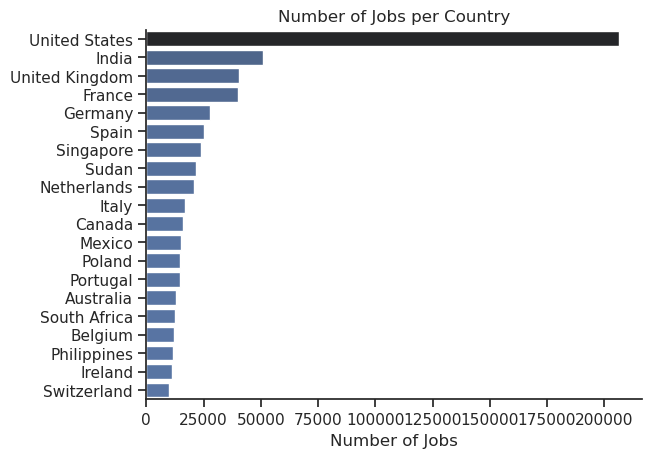

In [6]:


df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



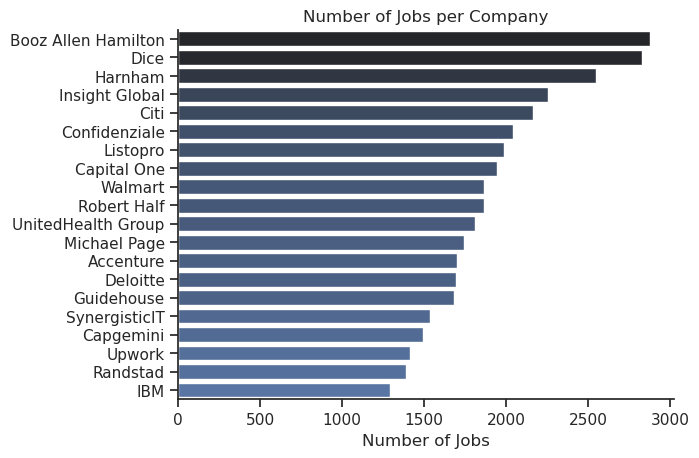

In [7]:


df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



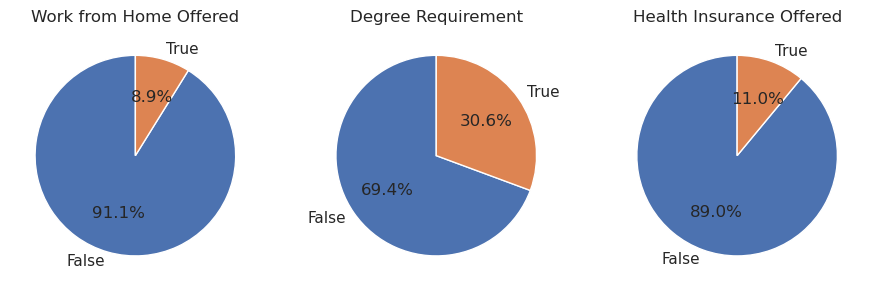

In [8]:


dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

